GROUP 1 PROJECT

Project objective: To diagnostically predict whether a patient has diabetes,
based on certain diagnostic measurements included in the dataset.

Dataset:This dataset is originally from the National Institute of Diabetes and Digestive and Kidney
Diseases. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage. Also from the data set we have several variables, some of them are independent (several medical predictor variables) and only one target dependent variable (Outcome).

Methodology: This proposed project will be done using machine learning. We want to create a system that does this by classifying the patients into diabetic and non-diabetic, so we are building a classification model. We will be using the logistic regression calssification algorithm and several evaluation matrices like confusion matrix, classification report. 

In [1]:
##Import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import dateutil.parser
import re

#set jupyter to display up to 50 columns, so we can see evrything
pd.set_option('display.max_columns', 50)
pd.set_option('expand_frame_repr', True)


sns.set_palette('hls')

#show figures in notebook
%matplotlib inline 

In [2]:
# to read our dataset
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
sorted(df['Age'].unique())

[21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 72,
 81]

The age range is between 21 and 81 years.

#### Checking the correlation between features ####

In [6]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<AxesSubplot:>

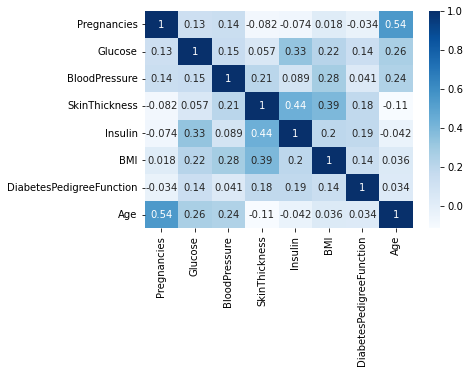

In [7]:
sns.heatmap(df.drop('Outcome', axis = 1).corr(), annot = True, cmap = 'Blues')

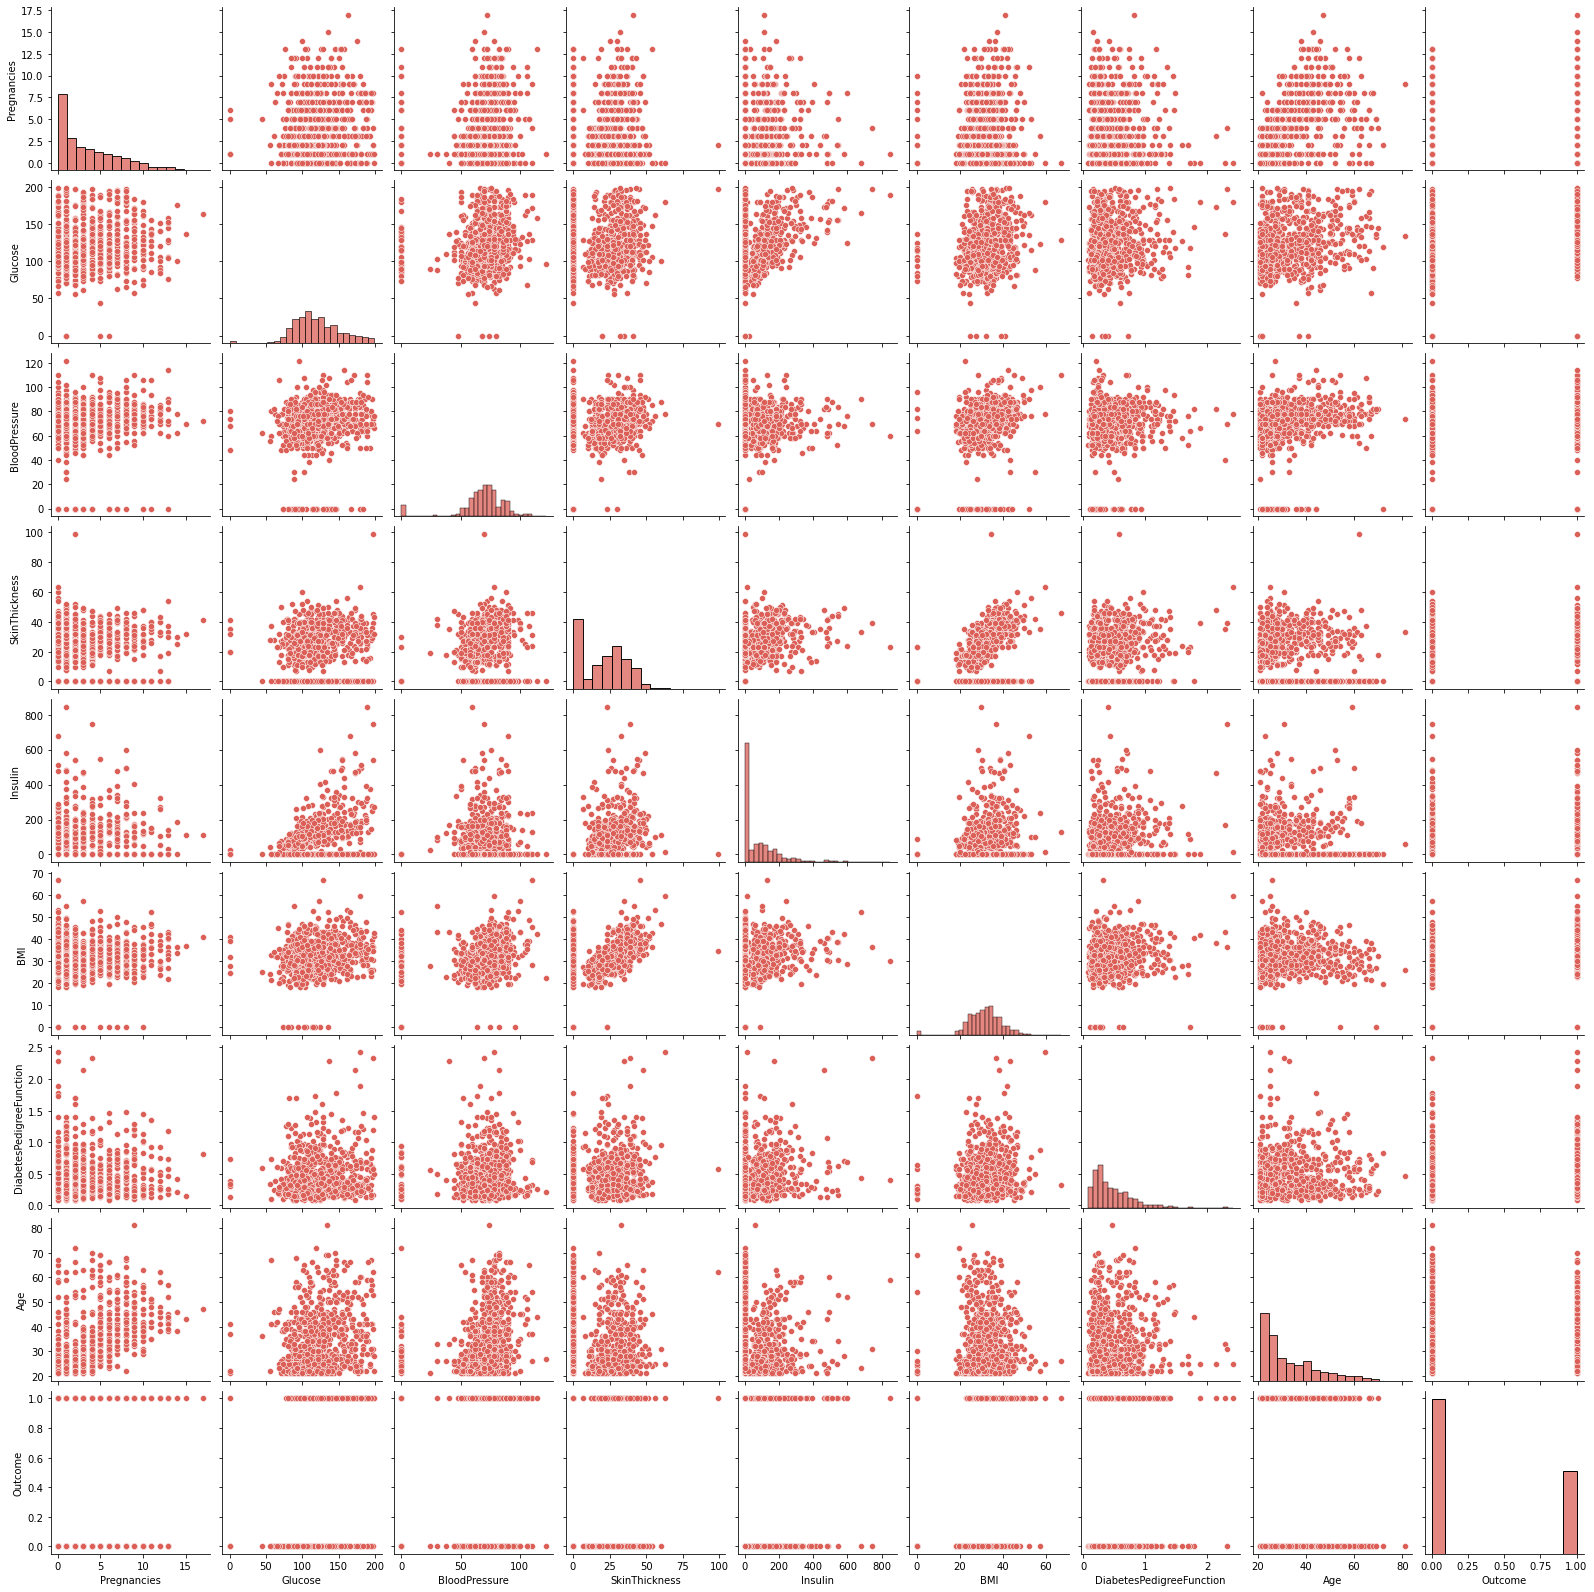

In [8]:
sns.pairplot(df)

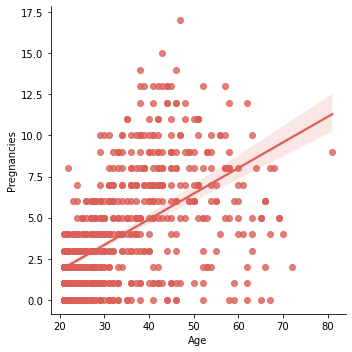

In [9]:
sns.lmplot(x = 'Age', y = 'Pregnancies', data = df )

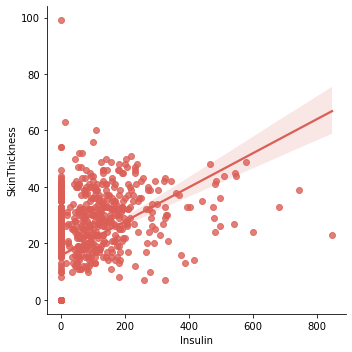

In [10]:
sns.lmplot(x = 'Insulin', y = 'SkinThickness', data = df )

In [11]:
df['Age'].value_counts()

22    72
21    63
25    48
24    46
23    38
28    35
26    33
27    32
29    29
31    24
41    22
30    21
37    19
42    18
33    17
38    16
36    16
32    16
45    15
34    14
46    13
43    13
40    13
39    12
35    10
50     8
51     8
52     8
44     8
58     7
47     6
54     6
49     5
48     5
57     5
53     5
60     5
66     4
63     4
62     4
55     4
67     3
56     3
59     3
65     3
69     2
61     2
72     1
81     1
64     1
70     1
68     1
Name: Age, dtype: int64

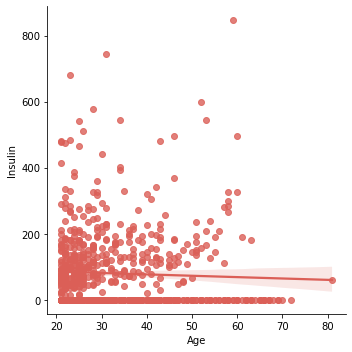

In [12]:
sns.lmplot(x = 'Age', y = 'Insulin', data = df )

<AxesSubplot:xlabel='Age', ylabel='Insulin'>

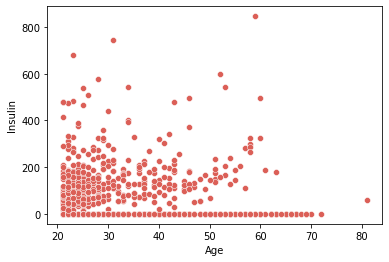

In [13]:
sns.scatterplot(x = 'Age', y = 'Insulin', data = df)

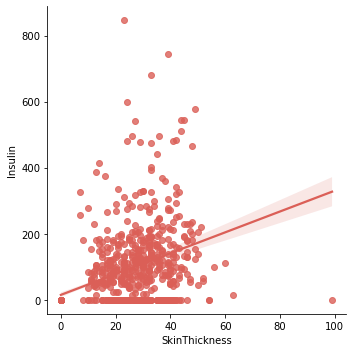

In [14]:
sns.lmplot(x = 'SkinThickness', y = 'Insulin', data = df )

In [15]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

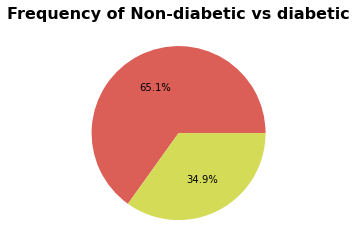

In [16]:
#Creating a pie chart for the frequency Non-diabetic against the diabetic
x = [500, 268]
labels = ['Non-diabetic', 'diabetic']
explode = [0,0]
plt.pie(x,explode,autopct='%1.1f%%')
plt.title('Frequency of Non-diabetic vs diabetic', fontweight='bold', fontsize=16)
plt.show()

Above shows that our dataset is imbalanced. Hence we will be adopting the confusion matrix and classification report evaluation methods to enable us provide more authetic picture of the 'outcome' prediction.

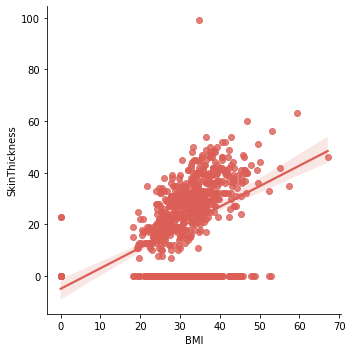

In [17]:
sns.lmplot(x = 'BMI', y = 'SkinThickness', data = df )

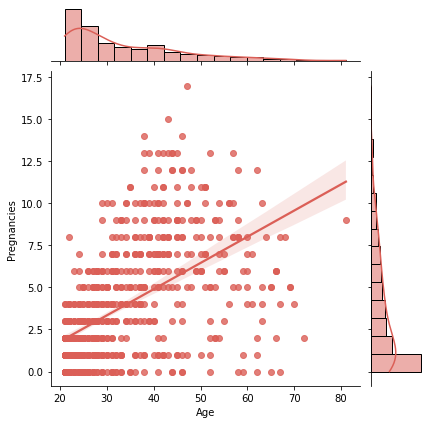

In [18]:
sns.jointplot(x = 'Age', y = 'Pregnancies', data = df, kind='reg' )

In [19]:
#splitting our data
X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = df['Outcome']

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [21]:
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

In [22]:
cols = X_train.columns

In [23]:
cols

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [24]:
#Feature Scaling

from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [25]:
X_test

array([[0.07692308, 1.        , 0.66666667, ..., 0.81096408, 0.72506887,
        0.02272727],
       [0.15384615, 0.53768844, 0.64912281, ..., 0.63516068, 0.17961433,
        0.04545455],
       [0.30769231, 0.38190955, 0.54385965, ..., 0.64272212, 0.17245179,
        0.09090909],
       ...,
       [0.07692308, 0.47738693, 0.52631579, ..., 0.45179584, 0.10027548,
        0.02272727],
       [0.07692308, 0.53266332, 0.66666667, ..., 0.70888469, 0.06556474,
        0.11363636],
       [0.76923077, 0.61306533, 0.68421053, ..., 0.52173913, 0.23911846,
        0.54545455]])

In [26]:
X_test = pd.DataFrame(X_test, columns=[cols])
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.076923,1.000000,0.666667,0.796296,0.000000,0.810964,0.725069,0.022727
1,0.153846,0.537688,0.649123,0.555556,0.147059,0.635161,0.179614,0.045455
2,0.307692,0.381910,0.543860,0.000000,0.000000,0.642722,0.172452,0.090909
3,0.384615,0.834171,0.631579,0.351852,0.257353,0.487713,0.280441,0.681818
4,0.000000,0.557789,0.570175,0.000000,0.000000,0.465028,0.320661,0.227273
...,...,...,...,...,...,...,...,...
226,0.461538,0.522613,0.649123,0.333333,0.229412,0.565217,0.354821,0.454545
227,0.615385,0.547739,0.666667,0.722222,0.167647,0.527410,0.309642,0.227273
228,0.076923,0.477387,0.526316,0.333333,0.085294,0.451796,0.100275,0.022727
229,0.076923,0.532663,0.666667,0.000000,0.000000,0.708885,0.065565,0.113636


In [27]:
X_train

array([[0.        , 0.76262626, 0.73770492, ..., 0.62742176, 0.12285959,
        0.        ],
       [0.05882353, 0.41919192, 0.55737705, ..., 0.27123696, 0.23116438,
        0.1       ],
       [0.11764706, 0.61616162, 0.57377049, ..., 0.54843517, 0.10958904,
        0.1       ],
       ...,
       [0.23529412, 0.47474747, 0.53278689, ..., 0.3681073 , 0.02739726,
        0.        ],
       [0.64705882, 0.42929293, 0.60655738, ..., 0.4485842 , 0.09246575,
        0.23333333],
       [0.29411765, 0.68686869, 0.67213115, ..., 0.        , 0.2380137 ,
        0.8       ]])

In [28]:
X_train = pd.DataFrame(X_train, columns=[cols])
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.000000,0.762626,0.737705,0.464646,0.000000,0.627422,0.122860,0.000000
1,0.058824,0.419192,0.557377,0.000000,0.000000,0.271237,0.231164,0.100000
2,0.117647,0.616162,0.573770,0.272727,0.000000,0.548435,0.109589,0.100000
3,0.235294,0.737374,0.639344,0.000000,0.000000,0.573770,0.186644,0.766667
4,0.000000,0.621212,0.590164,0.000000,0.000000,0.540984,0.074486,0.516667
...,...,...,...,...,...,...,...,...
532,0.588235,0.510101,0.622951,0.484848,0.212766,0.490313,0.037243,0.700000
533,0.411765,0.803030,0.540984,0.000000,0.000000,0.453055,0.127997,0.250000
534,0.235294,0.474747,0.532787,0.222222,0.000000,0.368107,0.027397,0.000000
535,0.647059,0.429293,0.606557,0.000000,0.000000,0.448584,0.092466,0.233333


In [29]:
#model training
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear', random_state = 0)
logreg.fit(X_train, y_train)

C:\Users\Jerusha\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


LogisticRegression(random_state=0, solver='liblinear')

In [30]:
#Testing the data
y_pred_test = logreg.predict(X_test)
y_pred_test

C:\Users\Jerusha\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


array([1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1], dtype=int64)

In [31]:
#Probability of getting zero i.e non-diabetic
logreg.predict_proba(X_test)[:, 0]

C:\Users\Jerusha\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


array([0.13288929, 0.67595936, 0.77734921, 0.25278113, 0.72917471,
       0.846099  , 0.23576265, 0.14991947, 0.45012738, 0.35522248,
       0.34959542, 0.07123444, 0.45731492, 0.62428605, 0.62787838,
       0.66488103, 0.16175029, 0.88004094, 0.32718799, 0.55910289,
       0.32512285, 0.58733675, 0.61343306, 0.72463667, 0.81314956,
       0.56670825, 0.83749257, 0.11722407, 0.73879066, 0.70224089,
       0.31899606, 0.61198559, 0.74725805, 0.41777394, 0.75460572,
       0.3166175 , 0.34426633, 0.77811955, 0.52801604, 0.32264613,
       0.60821679, 0.70250542, 0.63223119, 0.27578203, 0.15130186,
       0.91970217, 0.76296821, 0.60936168, 0.48350258, 0.60928072,
       0.47305039, 0.66539688, 0.13191471, 0.37440645, 0.68490693,
       0.96007413, 0.77587357, 0.49682157, 0.64436501, 0.72126393,
       0.21711332, 0.41135992, 0.78689257, 0.3691978 , 0.3882339 ,
       0.16102195, 0.26657397, 0.6719069 , 0.47107019, 0.66232409,
       0.7700401 , 0.45913197, 0.7568065 , 0.11464263, 0.29235

In [32]:
#Probability of getting 1 i.e diabetic
logreg.predict_proba(X_test)[:, 1]

C:\Users\Jerusha\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


array([0.86711071, 0.32404064, 0.22265079, 0.74721887, 0.27082529,
       0.153901  , 0.76423735, 0.85008053, 0.54987262, 0.64477752,
       0.65040458, 0.92876556, 0.54268508, 0.37571395, 0.37212162,
       0.33511897, 0.83824971, 0.11995906, 0.67281201, 0.44089711,
       0.67487715, 0.41266325, 0.38656694, 0.27536333, 0.18685044,
       0.43329175, 0.16250743, 0.88277593, 0.26120934, 0.29775911,
       0.68100394, 0.38801441, 0.25274195, 0.58222606, 0.24539428,
       0.6833825 , 0.65573367, 0.22188045, 0.47198396, 0.67735387,
       0.39178321, 0.29749458, 0.36776881, 0.72421797, 0.84869814,
       0.08029783, 0.23703179, 0.39063832, 0.51649742, 0.39071928,
       0.52694961, 0.33460312, 0.86808529, 0.62559355, 0.31509307,
       0.03992587, 0.22412643, 0.50317843, 0.35563499, 0.27873607,
       0.78288668, 0.58864008, 0.21310743, 0.6308022 , 0.6117661 ,
       0.83897805, 0.73342603, 0.3280931 , 0.52892981, 0.33767591,
       0.2299599 , 0.54086803, 0.2431935 , 0.88535737, 0.70764

In [33]:
#Checking for the counts of the predicted values
y_test.value_counts()

0    157
1     74
Name: Outcome, dtype: int64

We will be evaluating the model with different evaluation matrices;
-Accuracy score
-Confusion matrix
-Classification report

In [34]:
#check for accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred_test))

0.7316017316017316


In [35]:
#Checking for the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_test)

In [36]:
cm

array([[116,  41],
       [ 21,  53]], dtype=int64)

In [37]:
print('True positives (TP) = ', cm[0,0])
print('False positives (FP)= ', cm[0, 1])
print('False Negatives (FN)= ', cm[1, 0])
print('True Negatives (TN))= ', cm[1, 1])

True positives (TP) =  116
False positives (FP)=  41
False Negatives (FN)=  21
True Negatives (TN))=  53


In [38]:
#visualizing above confusion_matrix with a heatmap
from sklearn.metrics import ConfusionMatrixDisplay
displot = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = logreg.classes_)

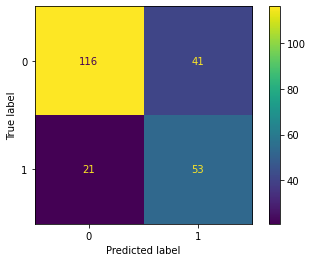

In [39]:
displot.plot()

TP = 116: meaning 116 non-diabetic class were correctly classified by the model
TN = 53; meaning 53 diabetic class were correctly classified by the model

FP = 41; meaning 41 diabetic were incorrectly classified by the model as belonging to non-diabetic class
FN = 21; meaning 21 non-diabetic were incorrectly classified as belonging to the diabetic class

Overall, the model looks good because we have larger number of true positive and true negative values.

In [40]:
#Getting the classification report
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.85      0.74      0.79       157
           1       0.56      0.72      0.63        74

    accuracy                           0.73       231
   macro avg       0.71      0.73      0.71       231
weighted avg       0.76      0.73      0.74       231



#### Conclusion ####

Recall score: Out of all the patients that were non-diabetic, the model only predicted correctly only 74% of the entire population and for the entire diabetic patients, only 72%.

Precision: 85% of the prediction for the non-diabetic were correct and 56% of the prediction for the diabetic were correct.

F1-score: As a rule of thumb, the closer the f1-score to 1, the better the model. The two F1-score are abit close to 1, so this tells us that the model does a fair job of predicting whether a patient is diabetic or non-diabetic.

We will still investigate further to see how to improve the model.

Follow-up Questions:

* What can we do better to make this a more robust model?
* Which score ranges determine a good model? So far we know that anything below 0.5 should not be used.